<a href="https://colab.research.google.com/github/chaitykundu/CNN_Project/blob/main/footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

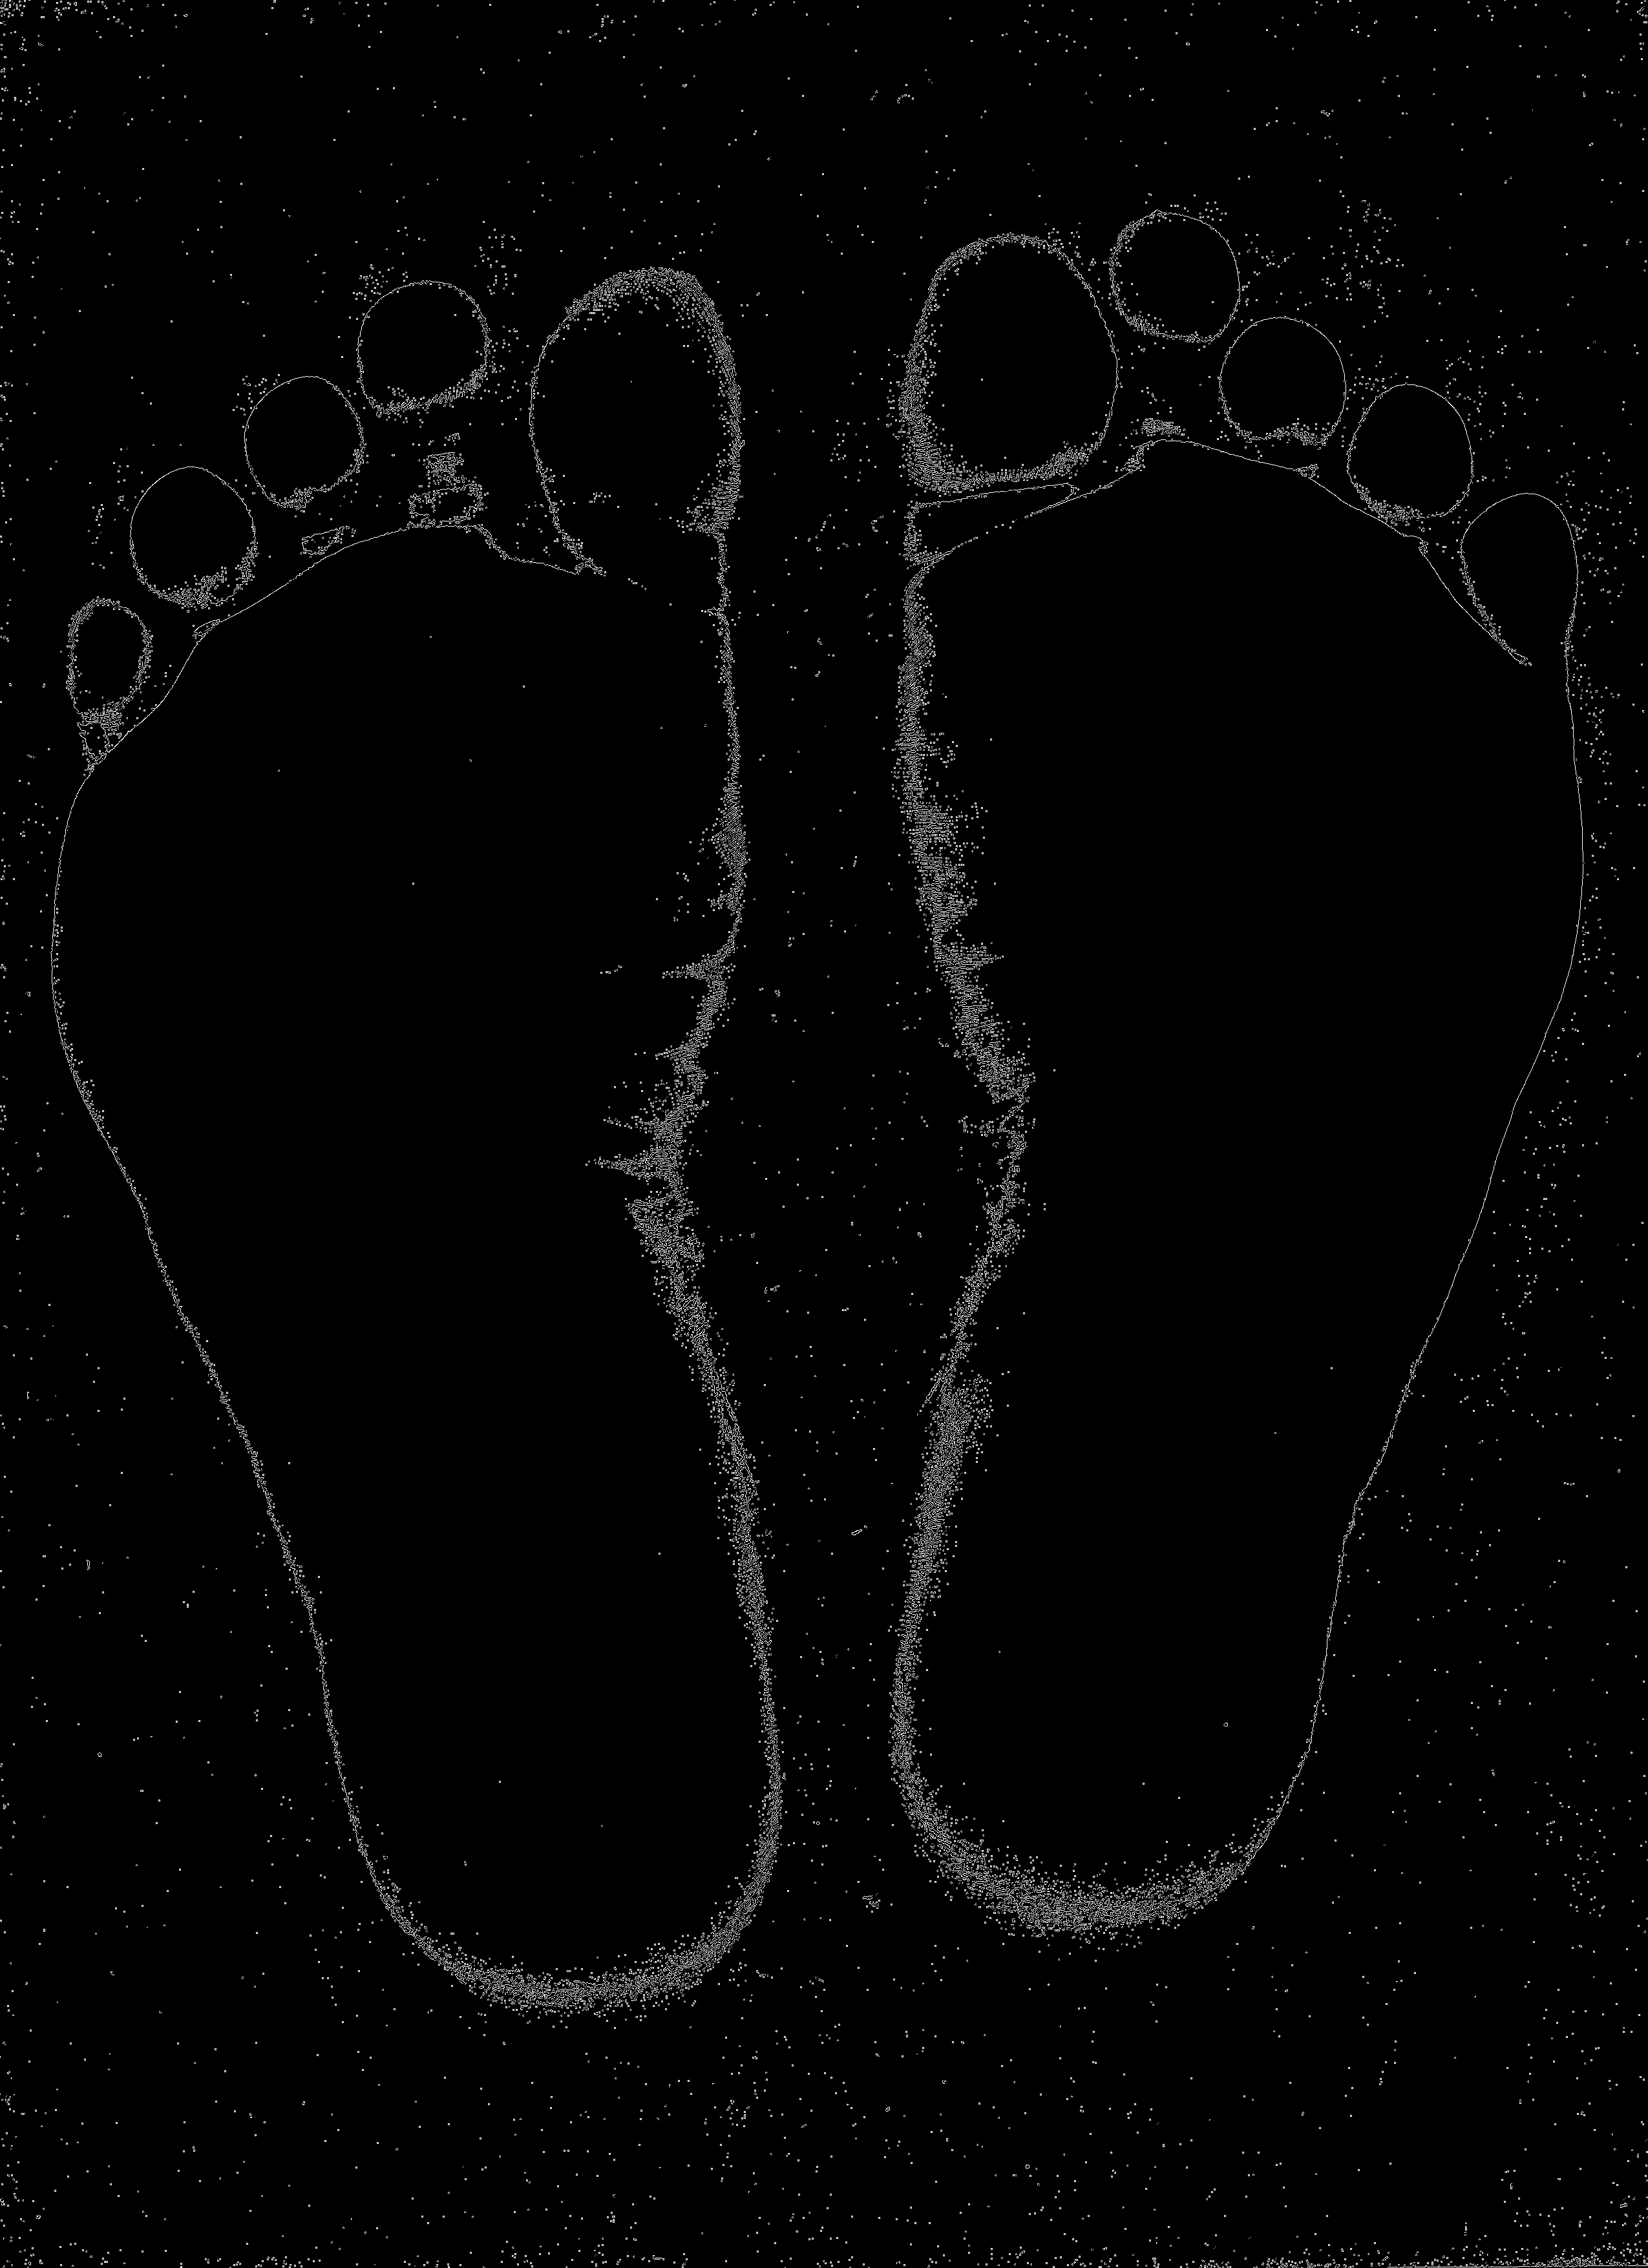

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the footprint image
image = cv2.imread('/content/8-5.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = cv2.Canny(thresholded, 100, 200)

# Show the edges (foot outline)
cv2_imshow(edges) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

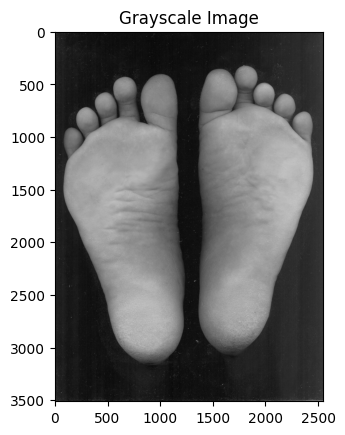

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/8-5.jpg')  # Replace with your image path

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image (optional)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()


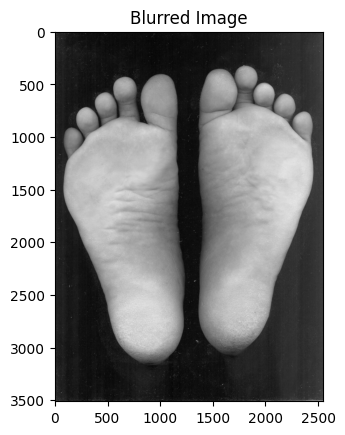

In [3]:
# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image (optional)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()


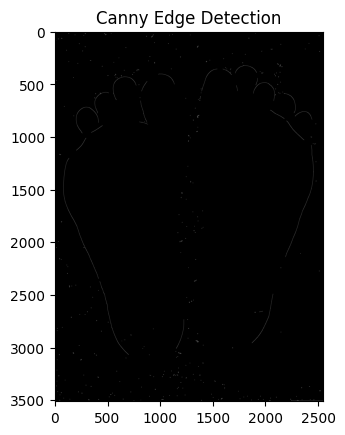

In [4]:
# Apply Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


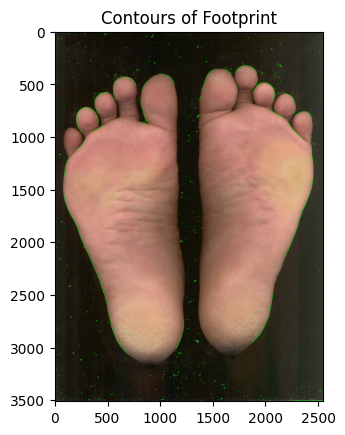

In [5]:
# Find contours from the edges detected by Canny
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Green color

# Display the contours
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours of Footprint')
plt.show()


In [9]:
# Assuming 'contours' are already found with cv2.findContours

# Extract the largest contour (this should be the footprint in this case)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to reduce the number of points (optional)
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

# Convert contour points to a numpy array
contour_points = np.array(approx_contour).reshape(-1, 2)  # Reshape if needed for further manipulation


In [10]:
def arch_height(x, max_height=0.5):
    # Create a simple parabola for the arch (height increases at the center)
    return max_height * (1 - (x**2))  # Adjust this function for better accuracy if needed

# Add height (Z) to each contour point based on its X-coordinate
contour_with_height = []
for point in contour_points:
    x, y = point
    z = arch_height(x / max(abs(contour_points[:, 0])))  # Normalize X for scaling
    contour_with_height.append((x, y, z))

# Convert to numpy array for easier manipulation
contour_with_height = np.array(contour_with_height)


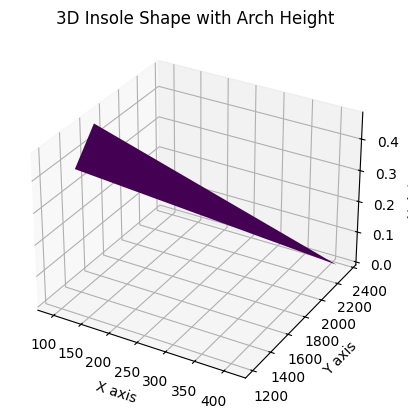

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid for the extrusion (simulating depth for the insole)
X = contour_with_height[:, 0]
Y = contour_with_height[:, 1]
Z = contour_with_height[:, 2]

# Plotting the 3D contour and extrusion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D plot by connecting points from contour (just for visualization)
ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Height (Z)')
ax.set_title('3D Insole Shape with Arch Height')

plt.show()
